In [1]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import librosa
import librosa.display
import librosa.core
import numpy as np

In [2]:
y,sr = librosa.load("..\\audiosamples\\waves\\POC-T2.wav")
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [3]:
print(y.shape, sr)

(1243904,) 22050


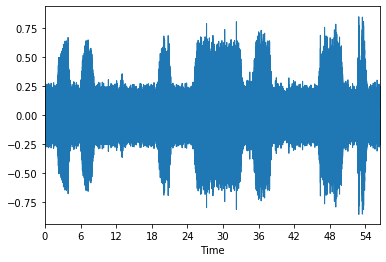

In [4]:
librosa.display.waveplot(y,sr)

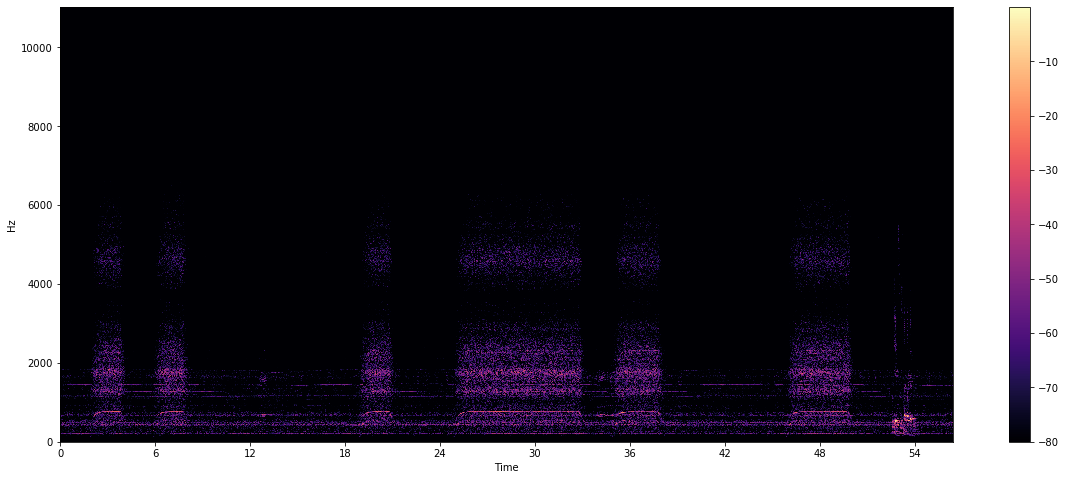

In [5]:
D = librosa.stft(y)
log_power = librosa.amplitude_to_db(np.abs(D**3), ref=np.max)
plt.figure(figsize=(20, 8))
librosa.display.specshow(log_power, x_axis='time', y_axis='linear')
plt.colorbar();

Text(0.5, 1.0, 'Log-frequency power spectrogram')

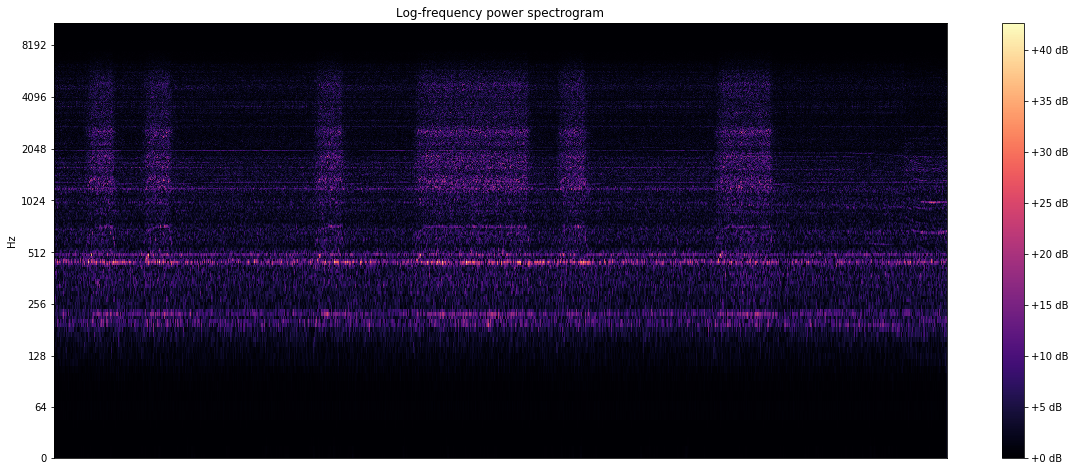

In [15]:
plt.figure(figsize=(20, 8))
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

Text(0.5, 1.0, 'Constant-Q power spectrogram (note)')

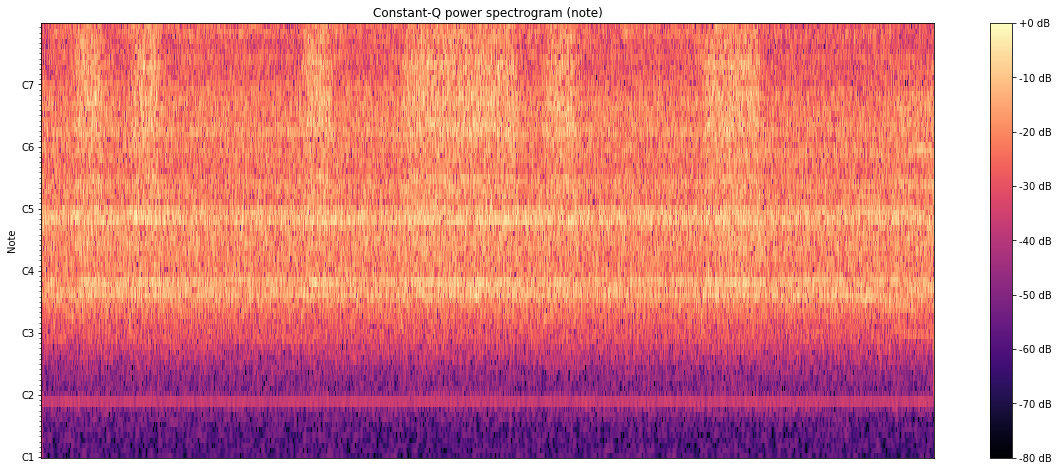

In [16]:
CQT = librosa.amplitude_to_db(np.abs(((librosa.cqt(y, sr)))), ref=np.max)
plt.figure(figsize=(20, 8))
librosa.display.specshow((CQT), y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')


Text(0.5, 1.0, 'Constant-Q power spectrogram (Hz)')

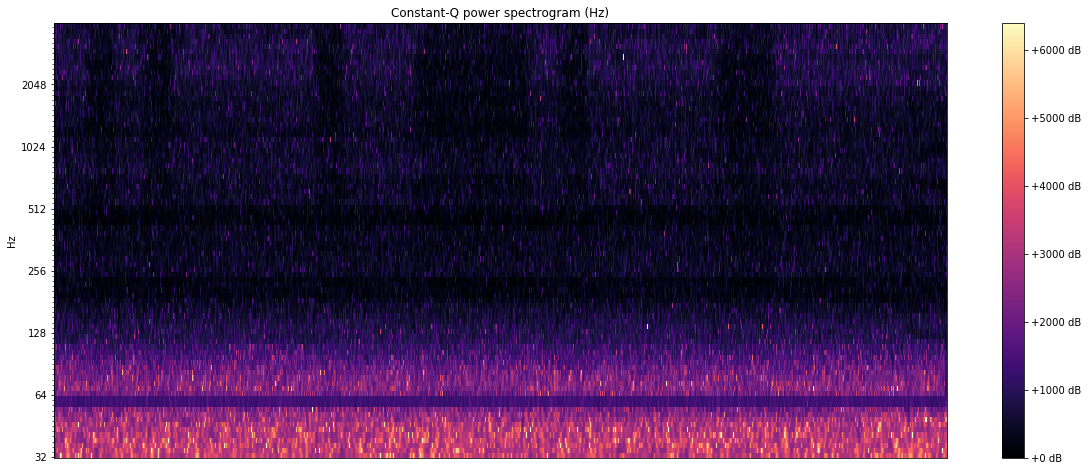

In [17]:
plt.figure(figsize=(20, 8))
librosa.display.specshow((CQT**2), y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

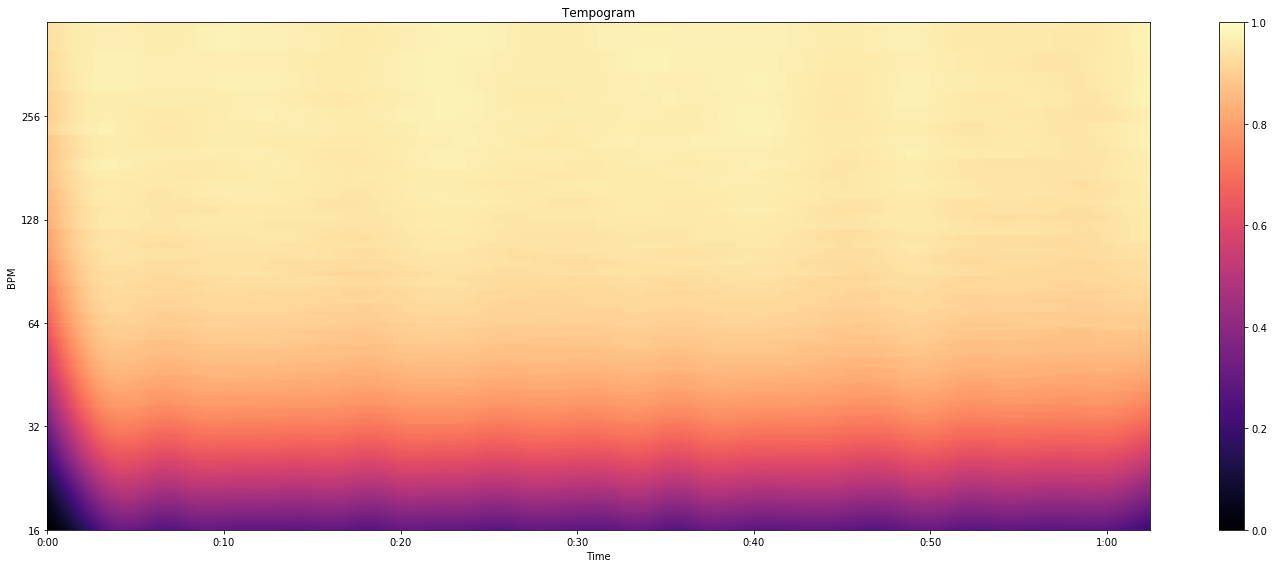

In [18]:
Tgram = librosa.feature.tempogram(y=y, sr=sr)
plt.figure(figsize=(20, 8))
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()
plt.show()